In [1]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

from pydataset import data
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import evaluate
import math

### 1. Load the tips dataset

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
# create the model

model = ols('tip ~ total_bill', data=df).fit()  
predictions = model.predict(df.total_bill)

In [5]:
# establish a baseline

df['yhat'] = predictions
df['baseline'] = df.tip.mean()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279


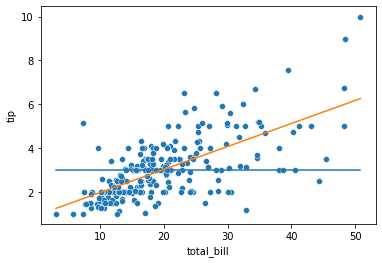

In [6]:
# plot data with baseline:

sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
sns.lineplot(x = 'total_bill', y = 'baseline', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat', data = df)

### 3. Plot the residuals for the linear regression model that you made

In [7]:
# establishing my residuals

df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


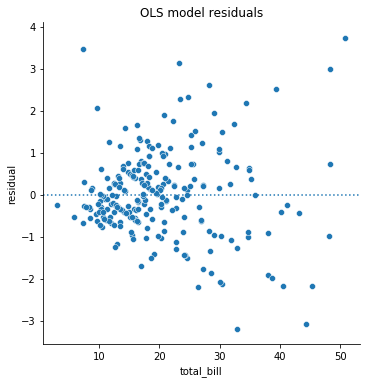

In [8]:
# plotting my model residuals

sns.relplot(x = 'total_bill', y = 'residual', data = df)
plt.axhline(0, ls = ':')
plt.title('OLS model residuals');

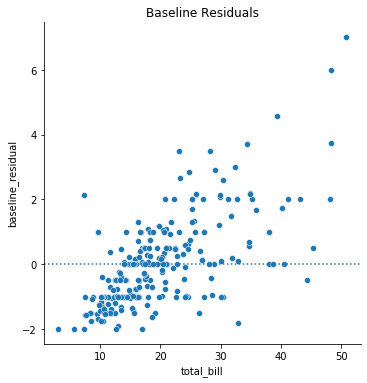

In [9]:
# plotting my baseline residuals

sns.relplot(x = 'total_bill', y = 'baseline_residual', data = df)
plt.axhline(0, ls = ':')
plt.title('Baseline Residuals');

### 4. Calculate the:
- mean squared error (MSE)
- sum of squared errors (SSE)
- root mean squared error (RMSE)
- total sum of squares (TSS)
    - TSS = SSE_baseline
    - TSS = SSE + ESS
- explained sum of squares (R<sup>2</sup>)
    - $R^2$ = ESS/TSS
    - $R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

In [10]:
# setting the squares

df['residual^2'] = df.residual ** 2

In [11]:
# calculating my SSE

SSE = sum(df['residual^2'])

print("SSE = ", SSE)

SSE =  252.78874385077603


In [12]:
# calculating my MSE

MSE = SSE/len(df)

print("MSE = ", MSE)

MSE =  1.036019442011377


In [13]:
# calculating my RMSE

from math import sqrt
RMSE = sqrt(MSE)

print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


In [14]:
# calculating my ESS and TSS

ESS = sum((df.yhat - df.tip.mean())**2)
TSS = ESS + SSE

print("ESS = ", ESS)
print("TSS = ", TSS)

ESS =  212.4237331984042
TSS =  465.2124770491802


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model

In [15]:
# calculating my baseline SSE

df['residual_baseline^2'] = df.baseline_residual ** 2
SSE_baseline = sum(df['residual_baseline^2'])
print("SSE - baseline = ", SSE_baseline)

SSE - baseline =  465.21247704918085


In [16]:
# calculating my baseline MSE

MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", MSE_baseline)

MSE baseline =  1.9066085124966428


In [17]:
# calculating my baseline RMSE

RMSE_baseline = sqrt(MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  1.3807999538298958


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [18]:
print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

if SSE < SSE_baseline:
    print("My model beat my baseline.")
else: 
    print("My baseline was better that my model")

SSE =  252.78874385077603
SSE - baseline =  465.21247704918085
My model beat my baseline.


### 7. What is the amount of variance explained in your model?

In [19]:
# Calculate R2

R2 = ESS/TSS
R2

0.45661658635167623

### 8. Is your model significantly better than the baseline model?

In [20]:
# in Statsmodel, look at the model summary:
    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        20:06:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
evaluate.better_than_baseline(df.tip, df.yhat)

True

### 9. Create a file named evaluate.py
- check

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model.

In [22]:
# load the dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


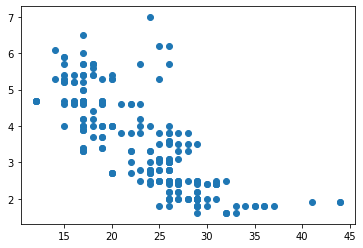

In [23]:
# create a scatterplot to look at distribution

plt.scatter(mpg.hwy, mpg.displ)

In [24]:
# create the model

model1 = ols('hwy ~ displ', data=mpg).fit()  
predictions = model1.predict(mpg.displ)

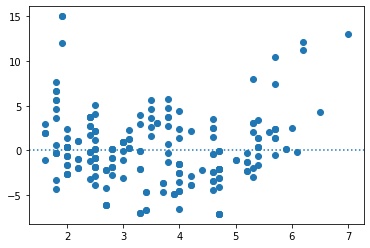

In [25]:
# looking at the model's distribution

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

In [26]:
# running my regression_errors function

evaluate.regression_errors(mpg.hwy, predictions)

SSE     3413.829009
MSE       14.589013
RMSE       3.819557
ESS     4847.833384
TSS     8261.662393
dtype: float64

In [27]:
# running better_than_baseline

evaluate.better_than_baseline(mpg.hwy, predictions)

True

In [29]:
# running model_significance

evaluate.model_significance(model1)

{'r^2 -- variance explained': 0.5867866723989039,
 'p-value -- P(data|model == baseline)': 2.0389744555910457e-46}